In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import librosa.feature
from pathlib import Path
import IPython
from scipy.signal import find_peaks

In [2]:
DATA_DIR = Path('data')

In [3]:
samples_directories = [ directory for directory in DATA_DIR.iterdir() if directory.is_dir() ]
print("number of valid samples: ", len(samples_directories))

number of valid samples:  10


In [4]:
SR = 18750
HOP_LEN = 64
N_FFT = 512

In [5]:
filesname = [ directory / "Ch1Dat" for directory in samples_directories ]
signals = [ np.fromfile(str(filename), dtype='float32') for filename in filesname ]

In [6]:
idx = 0

In [11]:
on_sets_time = librosa.frames_to_time(on_sets, sr=SR, hop_length=HOP_LEN, n_fft=N_FFT)
print(on_sets_time)

NameError: name 'on_sets' is not defined

In [298]:
class Onset_Detect:
    def __init__(self, signal, sr, n_fft, hop_len):
        self.SR = sr
        self.N_FFT = n_fft
        self.HOP_LEN = hop_len
        self.S = np.abs(librosa.core.stft(signal, n_fft=N_FFT, hop_length=HOP_LEN))
        self.Sdb = librosa.amplitude_to_db(self.S, ref=1.0)
        self.freqs = librosa.core.fft_frequencies(n_fft=n_fft)
            
    def spectrogram(self):
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(self.Sdb, y_axis='linear', x_axis='time', sr=SR, hop_length=HOP_LEN)
        plt.colorbar(format='%+2.0f dB')
        plt.tight_layout()
    
    def normalize(self, x):
        x -= np.mean(x)
        x /= np.std(x)
        return x
    
    def onset_detect(self, unit=20):
        for idx in range(unit, len(self.freqs), unit):
            Sdb_slice = self.normalize(self.Sdb[idx-unit:idx])
            Sdb_slice[Sdb_slice < 1] = 0
#             self.Sdb[idx-unit:idx] = self.normalize(self.Sdb[idx-unit:idx])
#         self.Sdb[self.Sdb < 1] = 0
            spectral_flux = self.spectral_flux(Sdb_slice)
            plt.plot(spectral_flux = self.spectral_flux(Sdb_slice))
            on_sets, _ = find_peaks(spectral_flux, height=)
            plt.plot(on_sets, spectral_flux[on_sets], 'rx')
            plt.show()
        
    def draw_hlines(self, freqs, color='w'):
        plt.hlines(freqs, 0, SR, colors=color, linestyles='--')
        
    # Function that input a numpy and only remain positive value
    def half_wave_rectifier(self, x):
        return (x + np.abs(x))/2
    
    # Sum the positive change in each frequency bin
    def spectral_flux(self, Sdb):
        return np.mean(self.half_wave_rectifier(np.diff(Sdb, axis=1)), axis=0)

In [299]:
audio = Onset_Detect(signals[idx], SR, N_FFT, HOP_LEN)

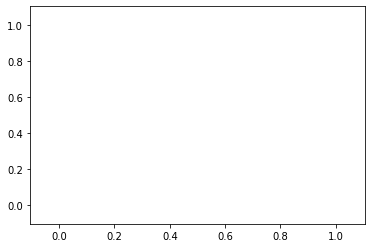

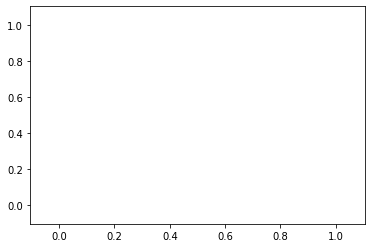

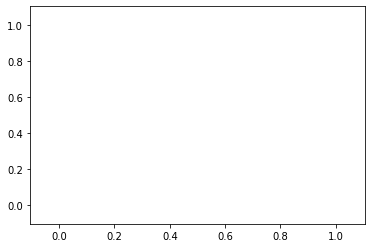

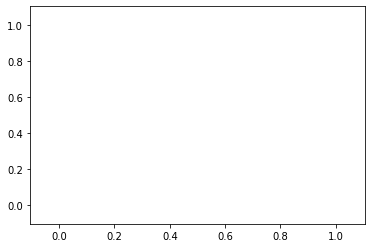

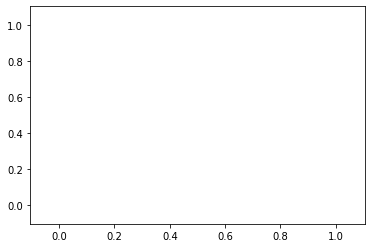

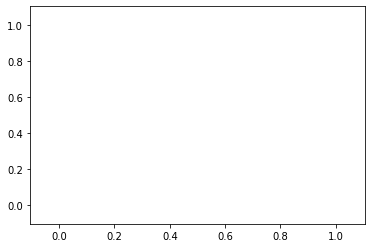

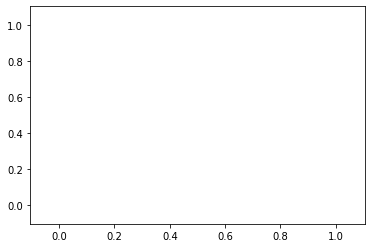

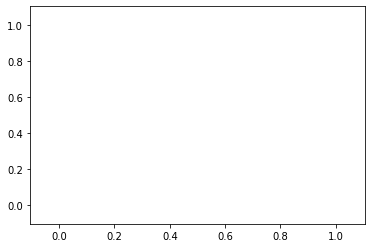

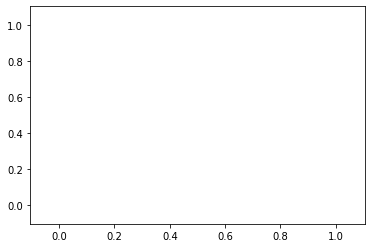

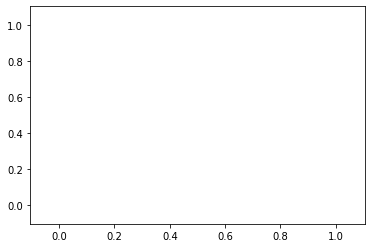

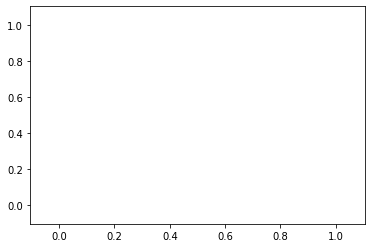

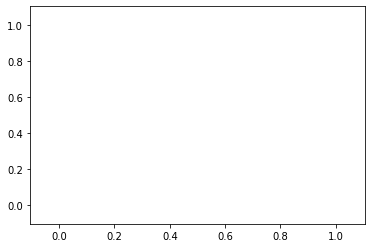

In [300]:
audio.onset_detect()

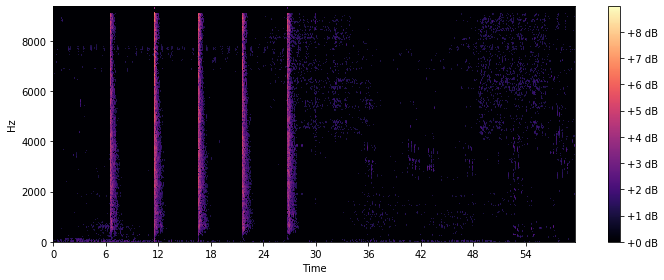

In [284]:
audio.spectrogram()